In [1]:
library(igraph)
library(data.table)
library(network)
library(intergraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

network: Classes for Relational Data
Version 1.13.0.1 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.


Attaching package: ‘network’

The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, 

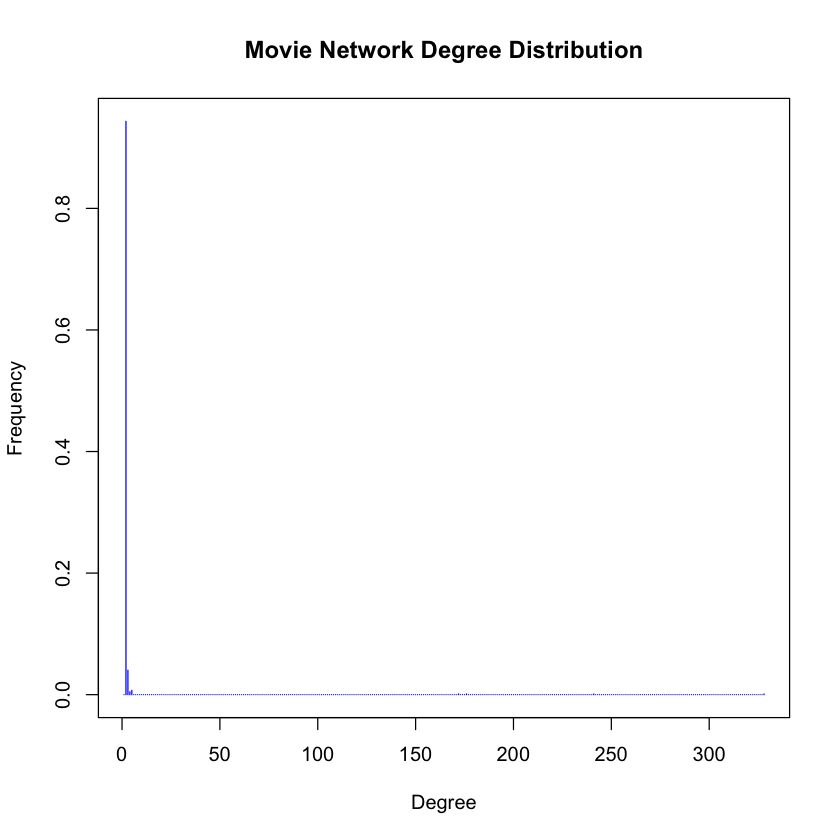

In [380]:
#Q6 degree distribution of the movie network
g = read.graph("/Users/duanli/Documents/P4/test.txt", format="ncol", directed=FALSE)
dd = degree.distribution(g)
plot(dd, type = "h", main = "Movie Network Degree Distribution", xlab = "Degree", ylab = "Frequency", col = "blue")

In [3]:
communities <- fastgreedy.community(g)
sizes(communities)

Community sizes
  1   2   3   4 
162 169 295 219 

In [4]:
# generate genre list
genre_data_frame = fread(input="/Users/duanli/Documents/232E/Project4/movie_genre_1tab.txt", sep = "\t", header = FALSE)
movie_data_frame = fread(input="/Users/duanli/Documents/232E/Project4/movie_map.txt", sep = "\t", header = FALSE)

Read 1010991 rows and 2 (of 2) columns from 0.032 GB file in 00:00:03


In [320]:
genre_list = c()
movie_name = ""
for (i in 1:vcount(g)){
    movie_id = V(g)$name[i]
    if (movie_id %in% movie_data_frame$V1) {
        movie_name = movie_data_frame$V2[which(movie_data_frame$V1 == movie_id)]
    }
    if(movie_name %in% genre_data_frame$V1){
        genre = genre_data_frame$V2[which(genre_data_frame$V1 == movie_name)]
    } else {
        genre = "NA"
    }
    output = sprintf("%s, %s", movie_name, genre)
    print(output)
    genre_list = rbind(genre_list, genre)
}

[1] "Liverpool (2012), Thriller"
[1] "669: Escape the Reality (2011), Thriller"
[1] "An Olimatsim adventure (2011), Short"
[1] "Cent jours avant le lendemain (2015), Thriller"
[1] "L'affaire Hawkins (2014), Thriller"
[1] "La peur anonyme (2014), Short"
[1] "La Peur aux trousse (2015), Thriller"
[1] "Les oiseaux se cachaient pour mourir (2015), Thriller"
[1] "Midnight Stranger (2011), Thriller"
[1] "New York Vengeance (2013), Thriller"
[1] "October Sunset (2017), Thriller"
[1] "Des humains bien tranquilles (2016), Thriller"
[1] "Les années folles (2016), Thriller"
[1] "Mocakoma (2013), Sport"
[1] "Mocakoma (2013), Sport"
[1] "Mocakoma (2013), Sport"
[1] "Mocakoma (2013), Sport"
[1] "Mocakoma (2013), Sport"
[1] "Mocakoma (2013), Sport"
[1] "Mocakoma (2013), Sport"
[1] "Mocakoma (2013), Sport"
[1] "Mocakoma (2013), Sport"
[1] "Mocakoma (2013), Sport"
[1] "Mocakoma (2013), Sport"
[1] "Mocakoma (2013), Sport"
[1] "Mocakoma (2013), Sport"
[1] "Mocakoma (2013), Sport"
[1] "Mocakoma (2013), Sp

In [6]:
# Q7 plot 10 communities
V(g)$genre = genre_list
genre_distribution = function(g, communities, com_id) {
    movie_i = (1:vcount(g))[communities$membership == com_id]
#     movie_i_genre = V(g)[movie_i]$genre[which(V(g)[movie_i]$genre != "NA")] 
    movie_i_genre = V(g)[movie_i]$genre
    table = table(movie_i_genre)
    len = length(table)
    occur_num = as.vector(table)
    occur_ratio = occur_num/sum(occur_num)
    p = occur_ratio/sum(occur_ratio)
    x = seq(1, len, by=1)
    plot(x, p, type = "o", main = sprintf("Movie Genre Distribution in Community %s", com_id), xlab = "Degree (Genre Id), Point labels are genres", ylab = "Frequency", col = "blue")
    text(p, labels = names(table), pos = 3, cex=0.5, font=2, col="red")
}

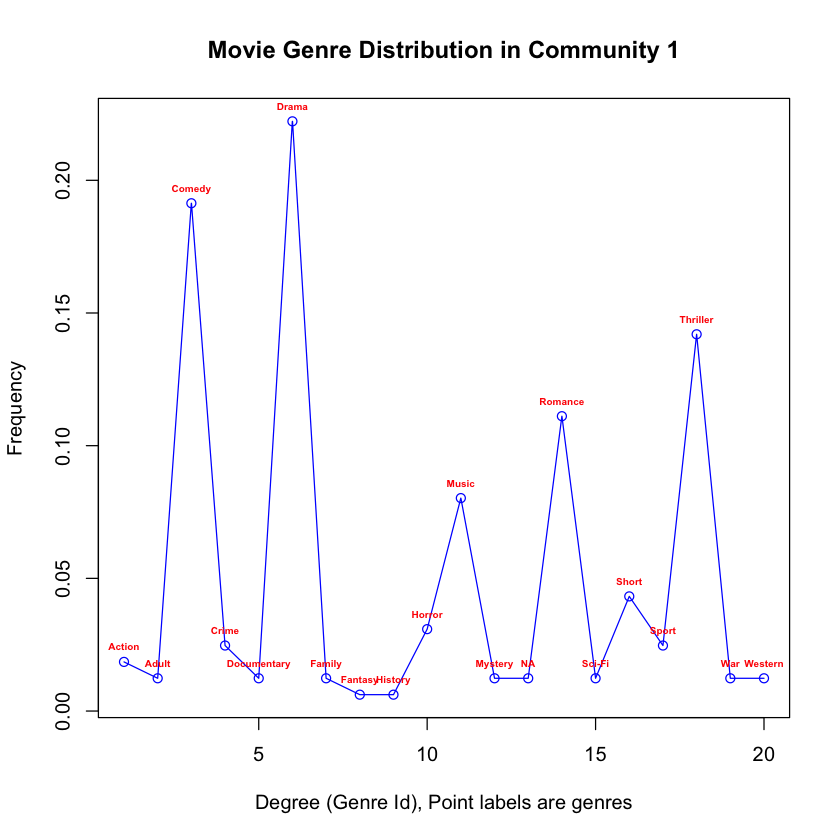

In [7]:
genre_distribution(g, communities, 1)

In [8]:
# Q8 (a)
genres = list()
occur = list()
for(i in 1:length(sizes(communities))) { 
    movies = (1:vcount(g))[communities$membership == i]
    movies_genre = V(g)[movies]$genre
    movies_genre = table(movies_genre)
    genres[[i]] = names(movies_genre[which.max(movies_genre)])
    occur[[i]] = movies_genre[which.max(movies_genre)]
}
for (i in 1:length(sizes(communities))) {
    print(sprintf("The most frequent dominant genre across community %s is %s (%s)", i, genres[[i]], occur[[i]] ))
}

[1] "The most frequent dominant genre across community 1 is Drama (36)"
[1] "The most frequent dominant genre across community 2 is Documentary (29)"
[1] "The most frequent dominant genre across community 3 is Drama (52)"
[1] "The most frequent dominant genre across community 4 is Thriller (36)"


In [9]:
# Q8 (b)
com_size = 0
total_size = sum(sizes(communities))
all_genre = table(V(g)$genre)
genres = list()
scores = list()
for(i in 1:length(sizes(communities))) { 
    max_score = 0
    com_size = sizes(communities)[i]
    movies = (1:vcount(g))[communities$membership == i]
    movies_genre = V(g)[movies]$genre
    movies_genre = table(movies_genre)
    for (j in 1:length(movies_genre)) {
        genre = names(movies_genre)[j]
        c = movies_genre[[j]]
        p = c / com_size
        q = all_genre[[genre]] / total_size
        score = log(c) * p / q
        if (score > max_score) {
            max_score = score
            scores[[i]] = max_score
            genres[[i]] = genre
        }
    }
}
for (i in 1:length(sizes(communities))) {
    print(sprintf("The the most frequent dominant genre across community %s is %s with score %s", i, genres[[i]], scores[[i]]))
}

[1] "The the most frequent dominant genre across community 1 is Comedy with score 6.4565959533081"
[1] "The the most frequent dominant genre across community 2 is Documentary with score 5.95436457741511"
[1] "The the most frequent dominant genre across community 3 is Music with score 5.41759831541257"
[1] "The the most frequent dominant genre across community 4 is Short with score 6.47837667768491"


In [10]:
# generate rating list
rating_data_frame = fread(input="/Users/duanli/Documents/232E/Project4/movie_rating_1tab.txt", sep = "\t", header = FALSE)
# movie_data_frame = fread(input="/Users/duanli/Documents/232E/Project4/movie_map.txt", sep = "\t", header = FALSE)

In [11]:
rating_list = c()
movie_name = ""
for (i in 1:vcount(g)){
    movie_id = V(g)$name[i]
    print(movie_id)
    if (movie_id %in% movie_data_frame$V1) {
        movie_name = movie_data_frame$V2[which(movie_data_frame$V1 == movie_id)]
    }
    if(movie_name %in% rating_data_frame$V1){
        rate = rating_data_frame$V2[which(rating_data_frame$V1 == movie_name)]
    } else {
        rate = "NA"
    }
    rating_list = rbind(rating_list, rate)
}

[1] "0"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "5"
[1] "6"
[1] "7"
[1] "8"
[1] "9"
[1] "25"
[1] "38"
[1] "2339"
[1] "2660"
[1] "3586"
[1] "3702"
[1] "4734"
[1] "5406"
[1] "5587"
[1] "6834"
[1] "7655"
[1] "7764"
[1] "7827"
[1] "7864"
[1] "9377"
[1] "9444"
[1] "9959"
[1] "10379"
[1] "11372"
[1] "11375"
[1] "12945"
[1] "12947"
[1] "14546"
[1] "16670"
[1] "17598"
[1] "18306"
[1] "19936"
[1] "20991"
[1] "21955"
[1] "22021"
[1] "22048"
[1] "23167"
[1] "23264"
[1] "27129"
[1] "27237"
[1] "28092"
[1] "29580"
[1] "31104"
[1] "31114"
[1] "31213"
[1] "32001"
[1] "33421"
[1] "33764"
[1] "34698"
[1] "35619"
[1] "39259"
[1] "40206"
[1] "40486"
[1] "41280"
[1] "41322"
[1] "43387"
[1] "43397"
[1] "44876"
[1] "45662"
[1] "46979"
[1] "47806"
[1] "48191"
[1] "48798"
[1] "48807"
[1] "51560"
[1] "51864"
[1] "53421"
[1] "53869"
[1] "54485"
[1] "55882"
[1] "57357"
[1] "57580"
[1] "58159"
[1] "58746"
[1] "59170"
[1] "60492"
[1] "60703"
[1] "61041"
[1] "61249"
[1] "61935"
[1] "62726"
[1] "64301"
[1] "64324"
[1] "

In [387]:
# Q9 plot 3 neighbor distributions
V(g)$rating = rating_list
find_neighbors = function(g, netg, movie) {
#     id = V(g)[which(V(g)$name == movie)]
    id = which(V(g)$name == movie)
#     nei_ids = neighbors(g,id)
    nei_ids = get.edgeIDs(netg,id,neighborhood="combined")
    rating_list = c()
    for (nei_id in nei_ids) {
        rate = V(g)[nei_id]$rating
        if (is.na(rate) | rate != "NA") {
            rating_list = rbind(rating_list, rate)
        }
    }
    table = table(rating_list)
    len = length(table)
    occur_num = as.vector(table)
    occur_ratio = occur_num/sum(occur_num)
    p = occur_ratio/sum(occur_ratio)
    x = seq(1, len, by=1)
    x_num = as.numeric(names(table))
    print(sprintf("most frequent rating of neighbors: %s (%s occur, %s freq)", x_num[which.max(p)], occur_num[which.max(p)], occur_ratio[which.max(p)]))
    print(sprintf("average rating of neighbors: %s", mean(x_num)))
    plot(x, p, type = "o", main = sprintf("Neighbor Rating Degree Distribution (Movie Id = %s)", movie), xlab = "Degree (Rating Id), Point labels are ratings", ylab = "Frequency", col = "blue")
    text(p, labels = names(table), pos = 3, cex=0.5, font=2, col="red")
    return (id)
#     occur = as.vector(table(rating_list))
#     occur = occur/sum(occur)
#     p = occur/sum(occur)
#     print(sum(occur))
#     x = as.numeric(names(table(rating_list)))
#     print(sprintf("most frequent rating of neighbors: %s", x[which.max(p)]))
#     print(sprintf("average rating of neighbors: %s", mean(x)))
#     plot(x, p, type = "o", main = sprintf("Neighbor Rating Degree Distribution (Movie Id = %s)", movie), xlab = "Degree", ylab = "Frequency", col = "blue")
}

Warning message in vattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”

+ 1/845 vertex, named, from 22f2f81:
  name rating
1    0    6.6
[1] "most frequent rating of neighbors: 6.4 (11 occur, 0.0679012345679012 freq)"
[1] "average rating of neighbors: 5.78260869565217"
[1] 1


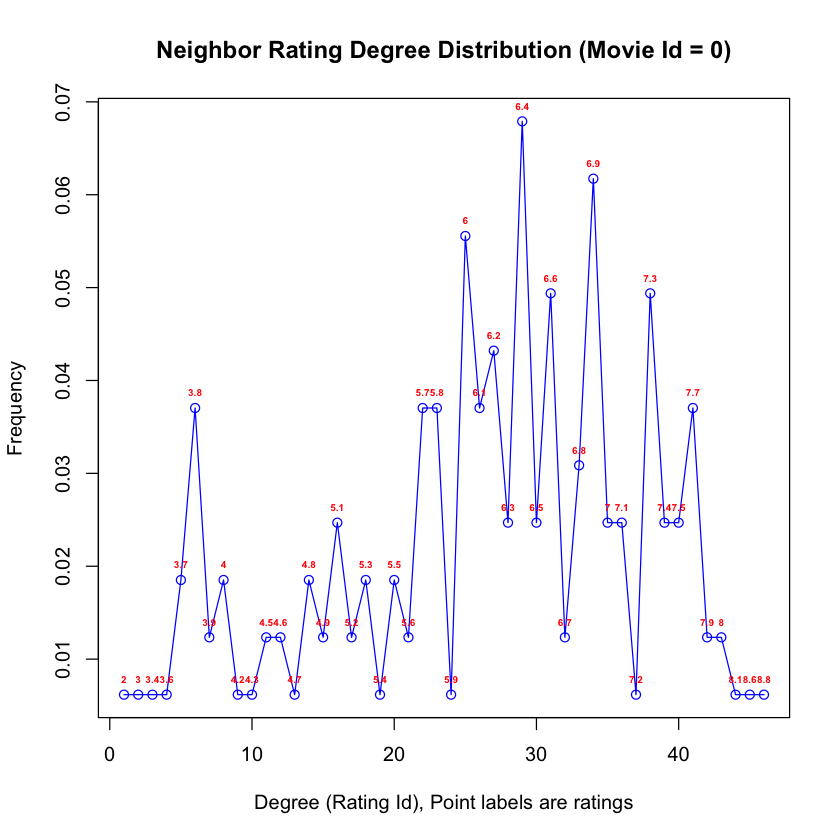

In [388]:
netg <- asNetwork(g)
print(V(g)[[1]])
id1 = find_neighbors(g,netg,0)
print(id1)

+ 1/845 vertex, named, from 522655d:
  name genre rating
2    1 Music    7.7
[1] "most frequent rating of neighbors: 5.8 (15 occur, 0.0505050505050505 freq)"
[1] "average rating of neighbors: 5.89636363636364"
[1] 2


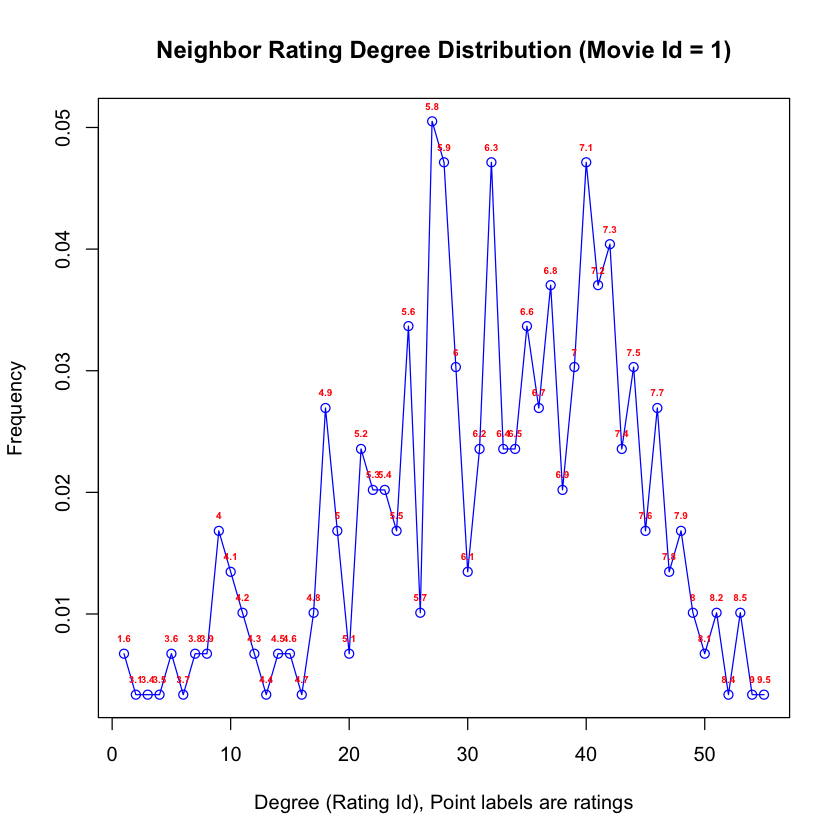

In [132]:
netg <- asNetwork(g)
print(V(g)[[2]])
id2 = find_neighbors(g,netg,1)
print(id2)

+ 1/845 vertex, named, from 522655d:
   name       genre rating
10    9 Documentary    7.7
[1] "most frequent rating of neighbors: 2 (1 occur, 0.333333333333333 freq)"
[1] "average rating of neighbors: 5.7"
[1] 10


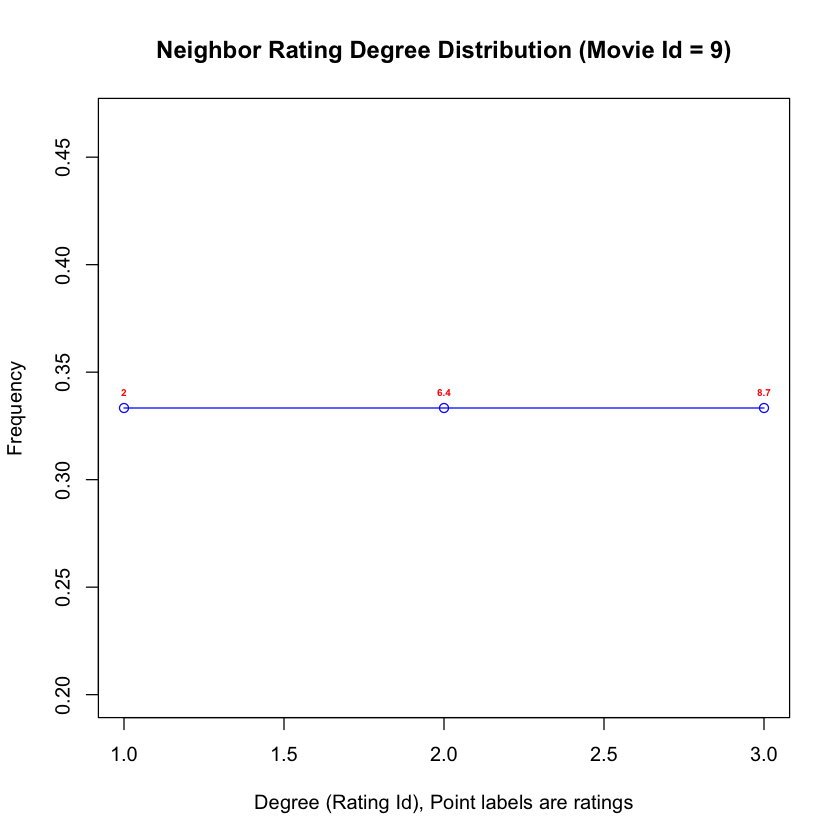

In [133]:
netg <- asNetwork(g)
print(V(g)[[10]])
id3 = find_neighbors(g,netg,9)
print(id3)

In [134]:
# Q10
find_same_coms = function(g, cmmunities, movies, ids) {
    same_coms = list()
    for(i in 1:length(sizes(communities))) { 
        movies_same_com = (1:vcount(g))[communities$membership == i]
        for (j in 1:length(movies)) {
            vids = V(g)[movies_same_com]
            id = ids[j]
#             id = V(g)[which(V(g)$name == movies[j])]
            if ( id %in% vids) {
                sub_g = induced_subgraph(g, vids)
                same_coms[[j]] = sub_g
            }
        }
    }
    return (same_coms)
}

[1] "most frequent rating of neighbors: 6.4 (11 occur, 0.0709677419354839 freq)"
[1] "average rating of neighbors: 5.81777777777778"
[1] "most frequent rating of neighbors: 5.8 (14 occur, 0.052434456928839 freq)"
[1] "average rating of neighbors: 5.95882352941176"


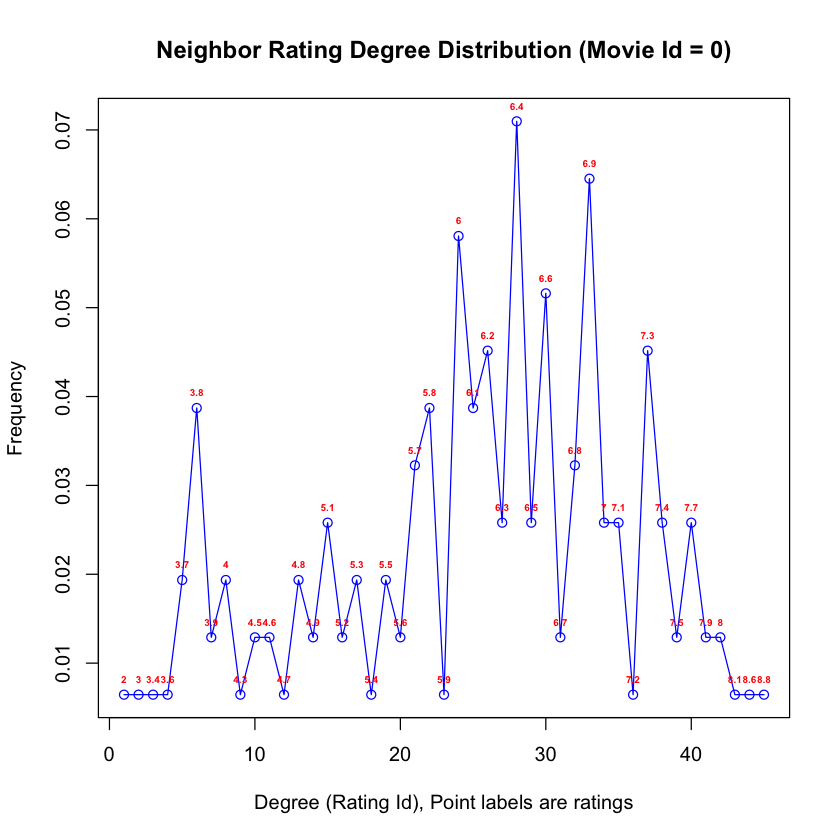

[1] "most frequent rating of neighbors: 7.5 (1 occur, 1 freq)"
[1] "average rating of neighbors: 7.5"


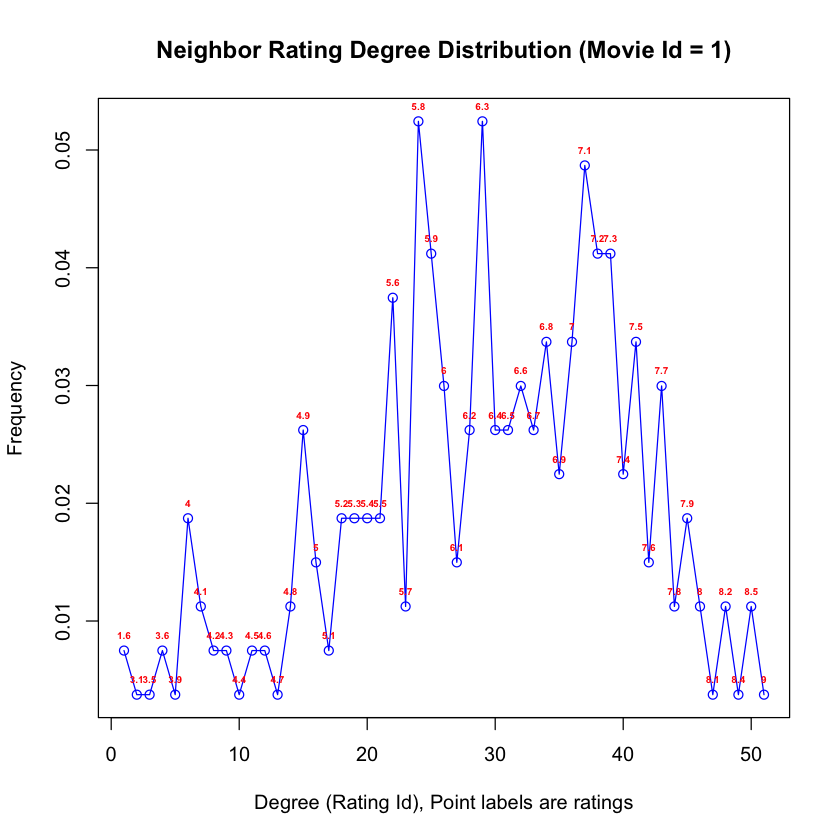

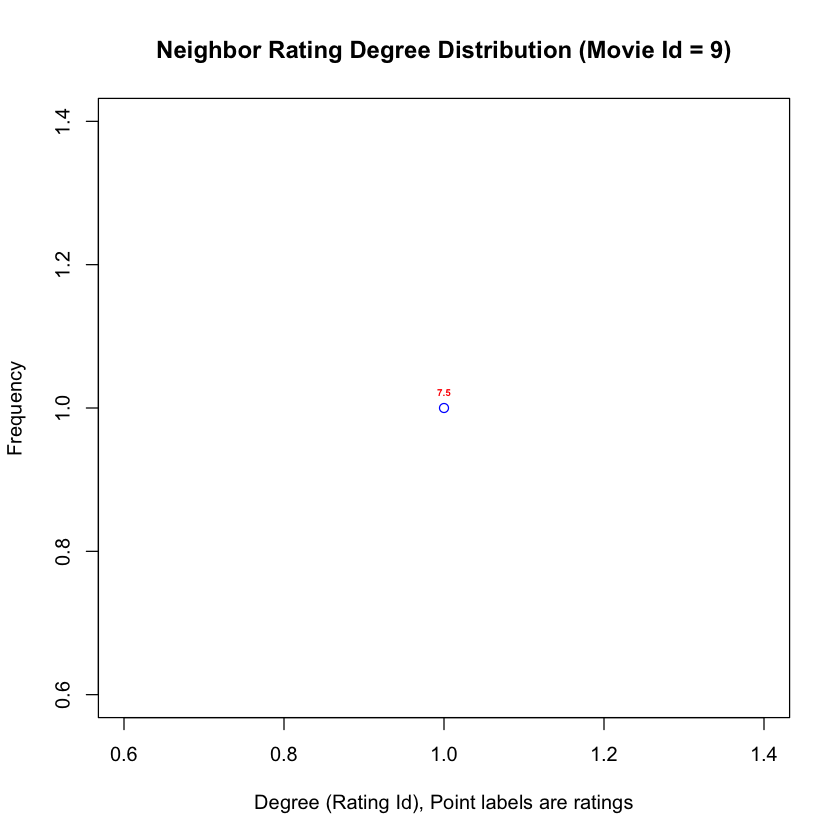

In [135]:
movies = c(0,1,9)
ids = c(id1,id2,id3)
coms = find_same_coms(g, communities, movies, ids)
# new_ids = list()
for(i in 1:length(coms)) {
    com = coms[[i]]
    new_id = which(V(com)$name == movies[i])
    n = asNetwork(com)
    find_neighbors(com,n,movies[i])
}

In [149]:
# generate genre list
movie_info = fread(input="/Users/duanli/Documents/232E/Project4/id_movie_genre_rating.txt", sep = "\t", header = FALSE)
genre_list_1 = c()
rating_list_1 = c()
movie_name = ""
for (i in 1:vcount(g)){
    movie_id = V(g)$name[i]
    genre = "NA"
    rating = "NA"
    if (movie_id %in% movie_info$V1) {
        genre = movie_info$V3[which(movie_info$V1 == movie_id)]
        rating = movie_info$V4[which(movie_info$V1 == movie_id)]
    }
    genre_list_1 = rbind(genre_list_1, genre)
    rating_list_1 = rbind(rating_list_1, rating)
}

In [150]:
print(genre_list_1)

      [,1]         
genre "Documentary"
genre "Music"      
genre "Comedy"     
genre "Drama"      
genre "Music"      
genre "Thriller"   
genre "Comedy"     
genre "Music"      
genre "Comedy"     
genre "Documentary"
genre "Documentary"
genre "War"        
genre "Crime"      
genre "Romance"    
genre "Drama"      
genre "Thriller"   
genre "Action"     
genre "Documentary"
genre "Thriller"   
genre "Crime"      
genre "Fantasy"    
genre "Thriller"   
genre "Comedy"     
genre "Drama"      
genre "Thriller"   
genre "Documentary"
genre "Comedy"     
genre "Music"      
genre "Documentary"
genre "History"    
genre "Documentary"
genre "Documentary"
genre "Romance"    
genre "Action"     
genre "Drama"      
genre "Fantasy"    
genre "Thriller"   
genre "Comedy"     
genre "Action"     
genre "Comedy"     
genre "Documentary"
genre "History"    
genre "Drama"      
genre "Documentary"
genre "Fantasy"    
genre "Thriller"   
genre "Drama"      
genre "Romance"    
genre "Thriller"   


In [151]:
print(rating_list_1)

       [,1]
rating  6.6
rating  7.7
rating  4.2
rating  5.7
rating   NA
rating  7.5
rating  5.3
rating  7.5
rating  6.4
rating  7.7
rating  7.3
rating  3.8
rating  6.6
rating  5.1
rating  4.3
rating  7.3
rating  3.8
rating   NA
rating  6.0
rating  4.8
rating  6.2
rating  6.6
rating  7.1
rating  6.0
rating  3.8
rating  7.0
rating  5.3
rating  6.2
rating  6.3
rating  6.9
rating  6.1
rating  6.9
rating  5.9
rating  8.8
rating  3.0
rating  8.1
rating  5.8
rating  6.9
rating  5.1
rating  7.3
rating  6.4
rating  7.7
rating  5.2
rating  7.3
rating  7.4
rating  5.7
rating  6.1
rating  6.7
rating  5.8
rating  5.3
rating  3.7
rating  4.9
rating  3.8
rating  3.7
rating  4.6
rating  3.8
rating  8.6
rating  6.2
rating  7.4
rating  6.9
rating  6.5
rating  6.9
rating  5.5
rating   NA
rating  6.1
rating  6.1
rating  7.5
rating  6.5
rating  6.6
rating  5.5
rating  6.4
rating  6.1
rating  6.9
rating  5.1
rating  4.5
rating  6.3
rating  6.4
rating  7.4
rating  5.5
rating   NA
rating  6.5
rating  6.3
rati

In [155]:
g1 = read.graph("test.txt", format="ncol", directed=FALSE)
V(g1)$genre = genre_list_1
V(g1)$rating = rating_list_1

In [157]:
communities1 <- fastgreedy.community(g1)
sizes(communities1)

Community sizes
  1   2   3   4 
162 169 295 219 

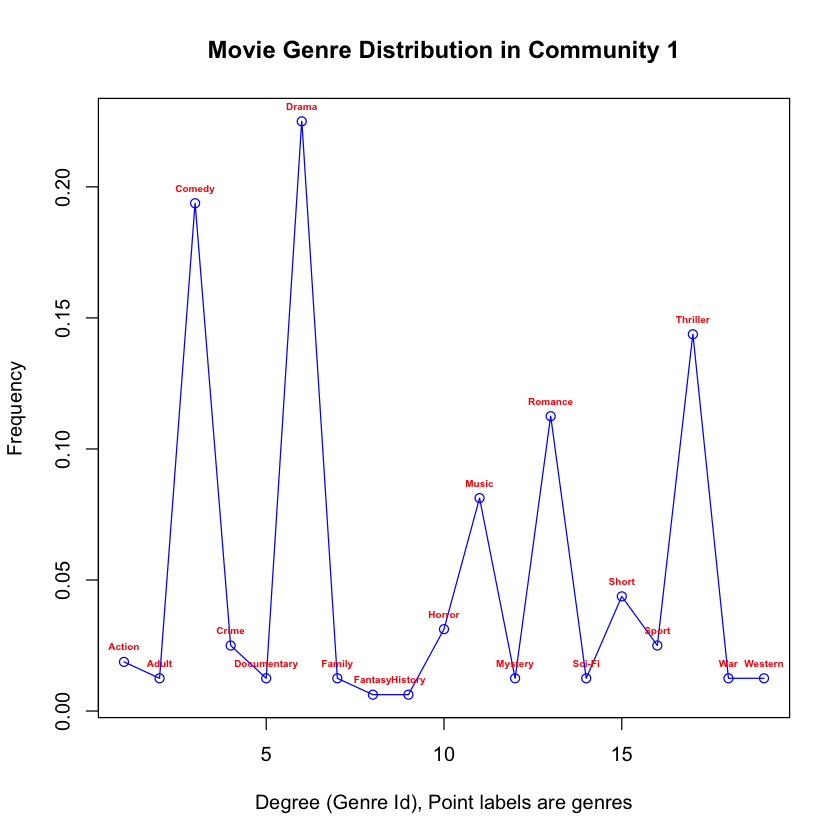

In [158]:
genre_distribution(g1, communities1, 1)

In [159]:
# Q8 (a)
genres = list()
occur = list()
for(i in 1:length(sizes(communities1))) { 
    movies = (1:vcount(g1))[communities1$membership == i]
    movies_genre = V(g1)[movies]$genre
    movies_genre = table(movies_genre)
    genres[[i]] = names(movies_genre[which.max(movies_genre)])
    occur[[i]] = movies_genre[which.max(movies_genre)]
}
for (i in 1:length(sizes(communities1))) {
    print(sprintf("The most frequent dominant genre across community %s is %s (%s)", i, genres[[i]], occur[[i]] ))
}

[1] "The most frequent dominant genre across community 1 is Drama (36)"
[1] "The most frequent dominant genre across community 2 is Documentary (29)"
[1] "The most frequent dominant genre across community 3 is Drama (52)"
[1] "The most frequent dominant genre across community 4 is Thriller (36)"


In [160]:
# Q8 (b)
com_size = 0
total_size = sum(sizes(communities1))
all_genre = table(V(g1)$genre)
genres = list()
scores = list()
for(i in 1:length(sizes(communities1))) { 
    max_score = 0
    com_size = sizes(communities1)[i]
    movies = (1:vcount(g1))[communities1$membership == i]
    movies_genre = V(g1)[movies]$genre
    movies_genre = table(movies_genre)
    for (j in 1:length(movies_genre)) {
        genre = names(movies_genre)[j]
        c = movies_genre[[j]]
        p = c / com_size
        q = all_genre[[genre]] / total_size
        score = log(c) * p / q
        if (score > max_score) {
            max_score = score
            scores[[i]] = max_score
            genres[[i]] = genre
        }
    }
}
for (i in 1:length(sizes(communities1))) {
    print(sprintf("The the most frequent dominant genre across community %s is %s with score %s", i, genres[[i]], scores[[i]]))
}

[1] "The the most frequent dominant genre across community 1 is Comedy with score 6.4565959533081"
[1] "The the most frequent dominant genre across community 2 is Documentary with score 5.95436457741511"
[1] "The the most frequent dominant genre across community 3 is Music with score 5.41759831541257"
[1] "The the most frequent dominant genre across community 4 is Short with score 6.47837667768491"


+ 1/845 vertex, named, from 30a40ce:
  name       genre rating
1    0 Documentary    6.6
[1] "most frequent rating of neighbors: 6.4 (11 occur, 0.0679012345679012 freq)"
[1] "average rating of neighbors: 5.78260869565217"
[1] 1


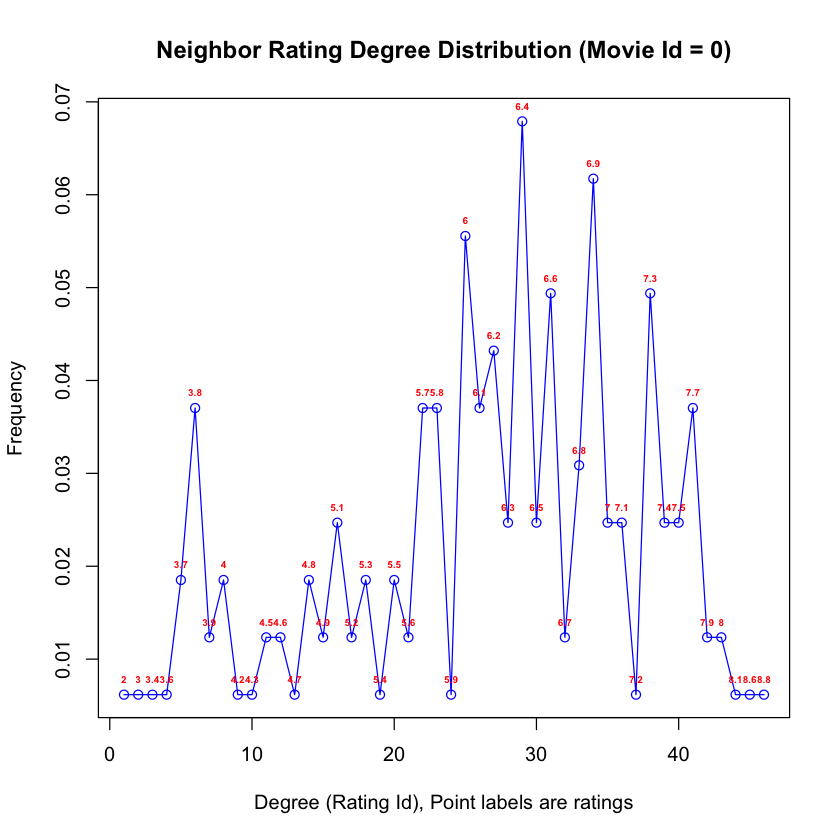

In [169]:
# Q9
netg1 <- asNetwork(g1)
print(V(g1)[[1]])
id1 = find_neighbors(g1,netg1,0)
print(id1)

+ 1/845 vertex, named, from 30a40ce:
  name genre rating
2    1 Music    7.7
[1] "most frequent rating of neighbors: 5.8 (15 occur, 0.0505050505050505 freq)"
[1] "average rating of neighbors: 5.89636363636364"
[1] 2


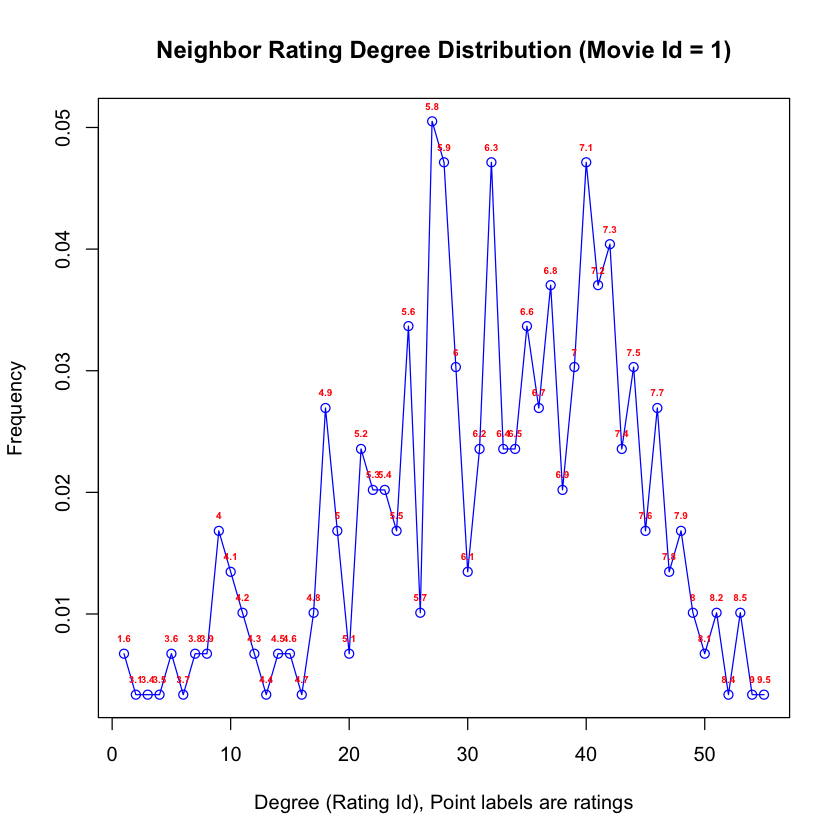

In [171]:
print(V(g1)[[2]])
id2 = find_neighbors(g1,netg1,1)
print(id2)

+ 1/845 vertex, named, from 30a40ce:
   name       genre rating
10    9 Documentary    7.7
[1] "most frequent rating of neighbors: 2 (1 occur, 0.333333333333333 freq)"
[1] "average rating of neighbors: 5.7"
[1] 10


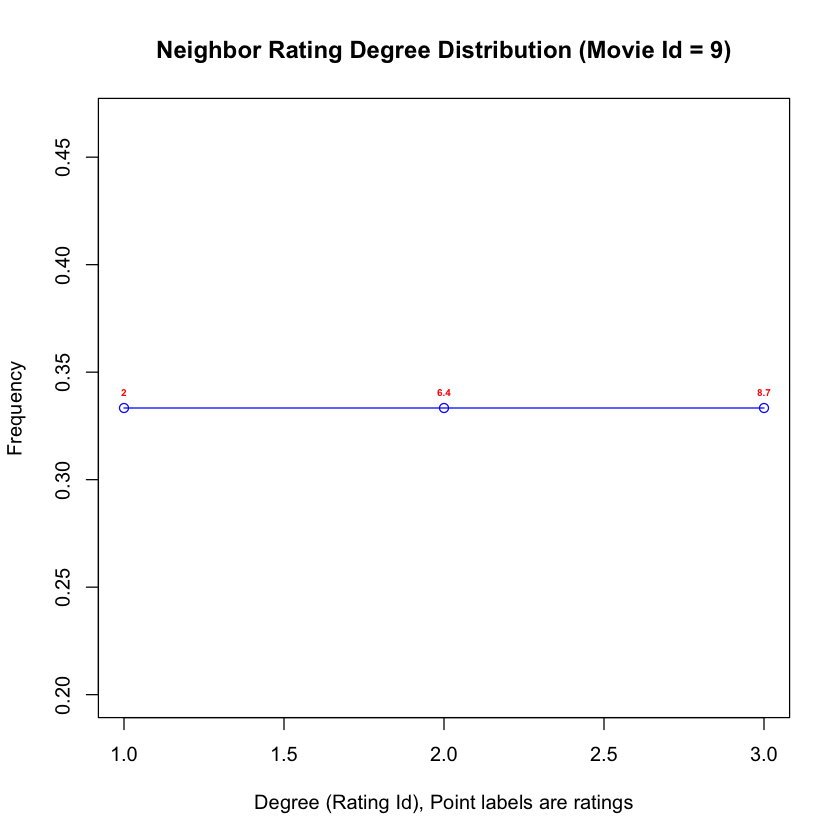

In [172]:
print(V(g1)[[10]])
id3 = find_neighbors(g1,netg1,9)
print(id3)

[1] "most frequent rating of neighbors: 6.4 (11 occur, 0.0709677419354839 freq)"
[1] "average rating of neighbors: 5.81777777777778"
[1] "most frequent rating of neighbors: 5.8 (14 occur, 0.052434456928839 freq)"
[1] "average rating of neighbors: 5.95882352941176"


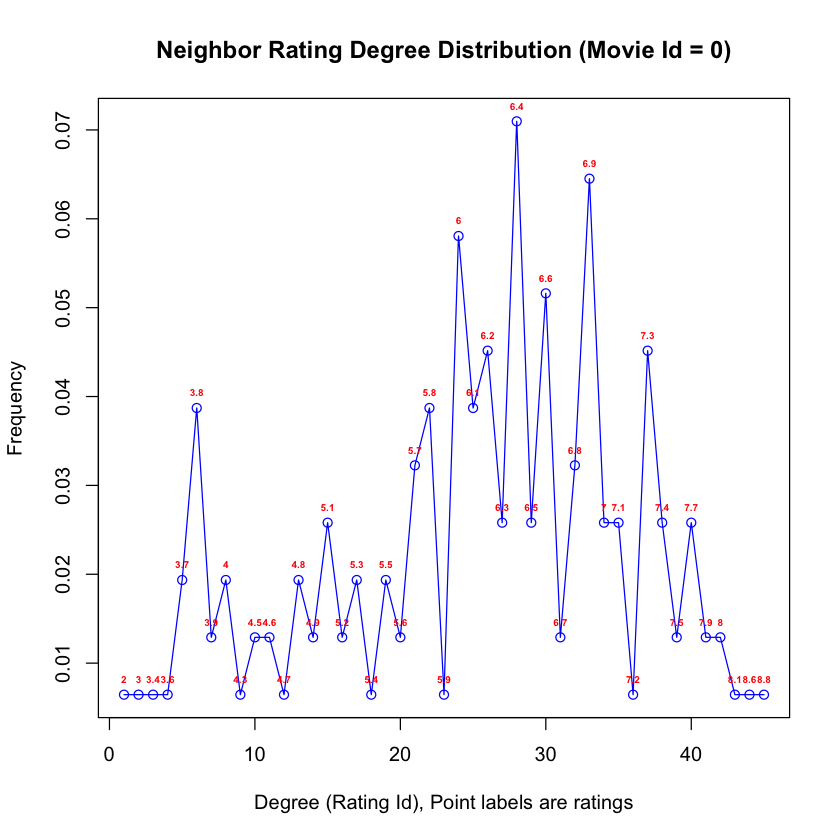

[1] "most frequent rating of neighbors: 7.5 (1 occur, 1 freq)"
[1] "average rating of neighbors: 7.5"


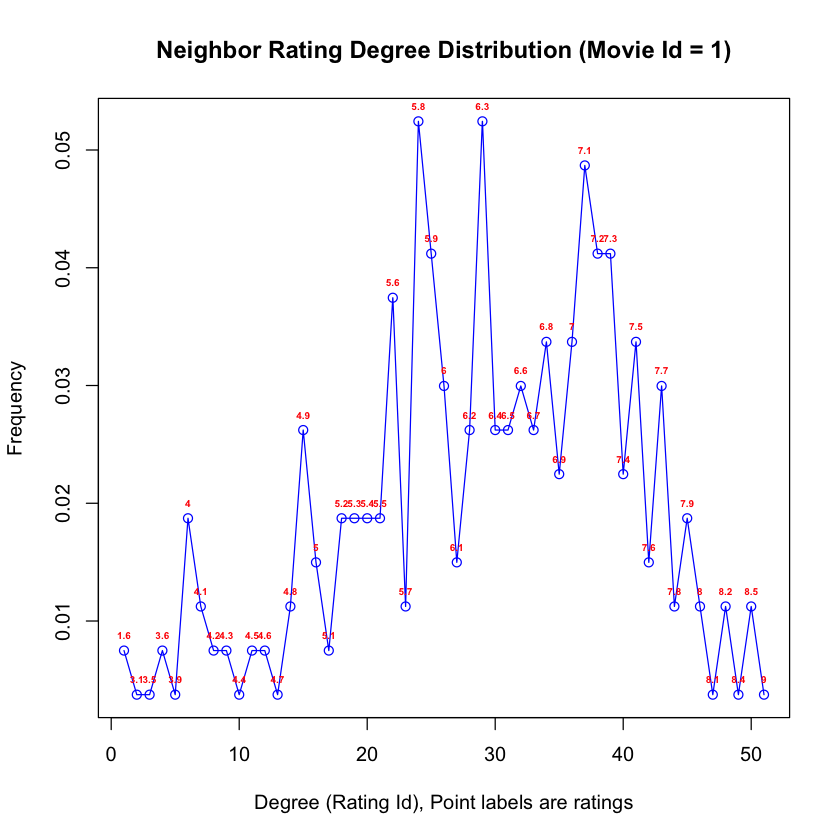

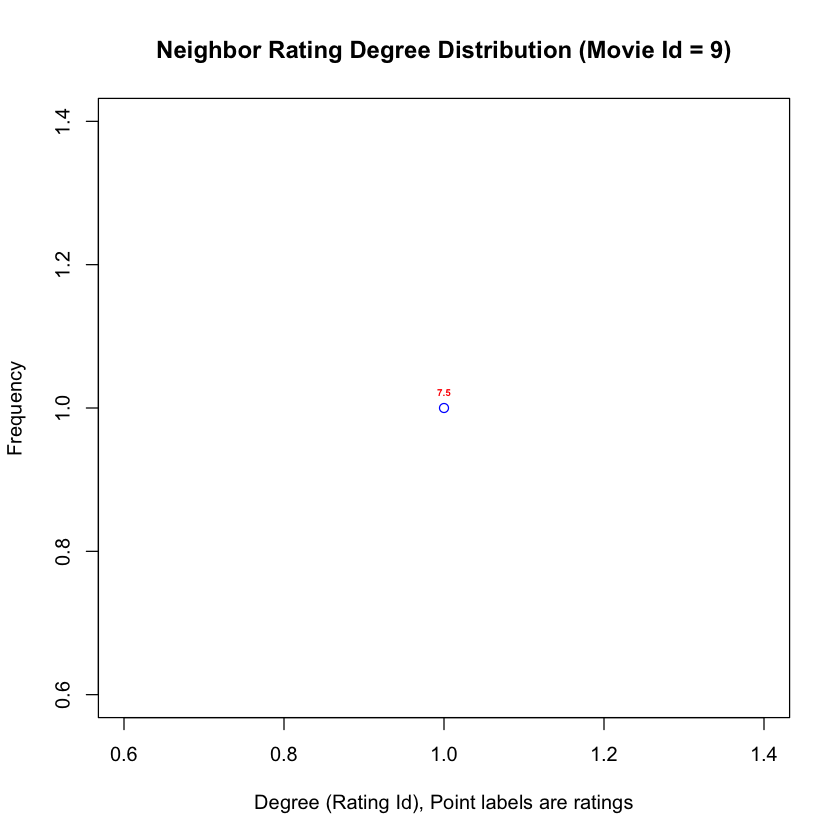

In [173]:
# Q10
movies = c(0,1,9)
ids = c(id1,id2,id3)
coms = find_same_coms(g1, communities1, movies, ids)
# new_ids = list()
for(i in 1:length(coms)) {
    com = coms[[i]]
    new_id = which(V(com)$name == movies[i])
    n = asNetwork(com)
    find_neighbors(com,n,movies[i])
}

In [175]:
library(igraph)
library(data.table)
library(network)
library(intergraph)

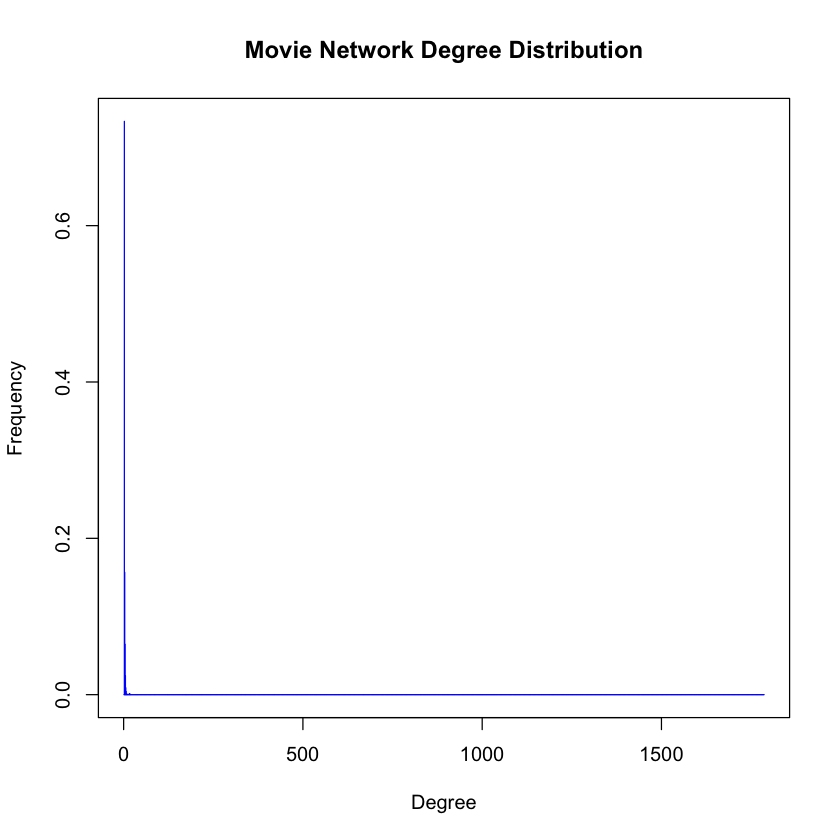

In [179]:
# Q6 degree distribution of the movie network
g = read.graph("test2.txt", format="ncol", directed=FALSE)
dd = degree.distribution(g)
plot(dd, type = "h", main = "Movie Network Degree Distribution", xlab = "Degree", ylab = "Frequency", col = "blue")

In [180]:
# find communities
communities <- fastgreedy.community(g)

In [181]:
sizes(communities)

Community sizes
   1    2    3    4    5    6    7    8    9   10   11 
 858  850 1294 2264  817 1699  364  122  631  148   77 

In [182]:
# generate genre and rating list
movie_info = fread(input="/Users/duanli/Documents/232E/Project4/id_movie_genre_rating.txt", sep = "\t", header = FALSE)

In [183]:
genre_list = c()
rating_list = c()
movie_name = ""
for (i in 1:vcount(g)){
    movie_id = V(g)$name[i]
    genre = "NA"
    rating = "NA"
    if (movie_id %in% movie_info$V1) {
        genre = movie_info$V3[which(movie_info$V1 == movie_id)]
        rating = movie_info$V4[which(movie_info$V1 == movie_id)]
    }
    genre_list = rbind(genre_list, genre)
    rating_list = rbind(rating_list, rating)
}

In [184]:
print(genre_list)

      [,1]         
genre "Documentary"
genre "Music"      
genre "Comedy"     
genre "Drama"      
genre "Music"      
genre "Thriller"   
genre "Comedy"     
genre "Music"      
genre "Comedy"     
genre "Documentary"
genre "Documentary"
genre "War"        
genre "Crime"      
genre "Romance"    
genre "Drama"      
genre "Thriller"   
genre "Action"     
genre "Documentary"
genre "Thriller"   
genre "Crime"      
genre "Fantasy"    
genre "Thriller"   
genre "Comedy"     
genre "Drama"      
genre "Thriller"   
genre "Documentary"
genre "Comedy"     
genre "Music"      
genre "Documentary"
genre "History"    
genre "Documentary"
genre "Documentary"
genre "Romance"    
genre "Action"     
genre "Drama"      
genre "Fantasy"    
genre "Thriller"   
genre "Comedy"     
genre "Action"     
genre "Comedy"     
genre "Documentary"
genre "History"    
genre "Drama"      
genre "Documentary"
genre "Fantasy"    
genre "Thriller"   
genre "Drama"      
genre "Romance"    
genre "Thriller"   


In [186]:
print(rating_list)

       [,1]
rating  6.6
rating  7.7
rating  4.2
rating  5.7
rating   NA
rating  7.5
rating  5.3
rating  7.5
rating  6.4
rating  7.7
rating  7.3
rating  3.8
rating  6.6
rating  5.1
rating  4.3
rating  7.3
rating  3.8
rating   NA
rating  6.0
rating  4.8
rating  6.2
rating  6.6
rating  7.1
rating  6.0
rating  3.8
rating  7.0
rating  5.3
rating  6.2
rating  6.3
rating  6.9
rating  6.1
rating  6.9
rating  5.9
rating  8.8
rating  3.0
rating  8.1
rating  5.8
rating  6.9
rating  5.1
rating  7.3
rating  6.4
rating  7.7
rating  5.2
rating  7.3
rating  7.4
rating  5.7
rating  6.1
rating  6.7
rating  5.8
rating  5.3
rating  3.7
rating  4.9
rating  3.8
rating  3.7
rating  4.6
rating  3.8
rating  8.6
rating  6.2
rating  7.4
rating  6.9
rating  6.5
rating  6.9
rating  5.5
rating   NA
rating  6.1
rating  6.1
rating  7.5
rating  6.5
rating  6.6
rating  5.5
rating  6.4
rating  6.1
rating  6.9
rating  5.1
rating  4.5
rating  6.3
rating  6.4
rating  7.4
rating  5.5
rating   NA
rating  6.5
rating  6.3
rati

In [187]:
V(g)$genre = genre_list
V(g)$rating = rating_list

In [188]:
# Q7 plot 10 communities
genre_distribution = function(g, communities, com_id) {
    movie_i = (1:vcount(g))[communities$membership == com_id]
#     movie_i_genre = V(g)[movie_i]$genre[which(V(g)[movie_i]$genre != "NA")] 
    movie_i_genre = V(g)[movie_i]$genre
    table = table(movie_i_genre)
    len = length(table)
    occur_num = as.vector(table)
    occur_ratio = occur_num/sum(occur_num)
    p = occur_ratio/sum(occur_ratio)
    x = seq(1, len, by=1)
    plot(x, p, type = "o", main = sprintf("Movie Genre Distribution in Community %s", com_id), xlab = "Degree (Genre Id), Point labels are genres", ylab = "Frequency", col = "blue")
    text(p, labels = names(table), pos = 3, cex=0.5, font=2, col="red")
}

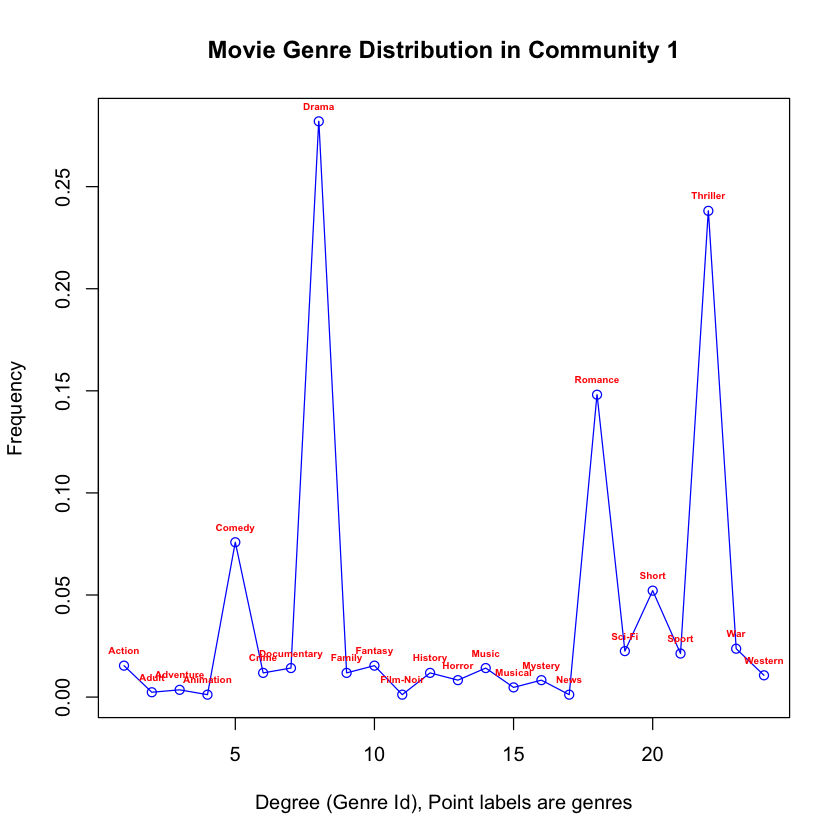

In [189]:
genre_distribution(g, communities, 1)

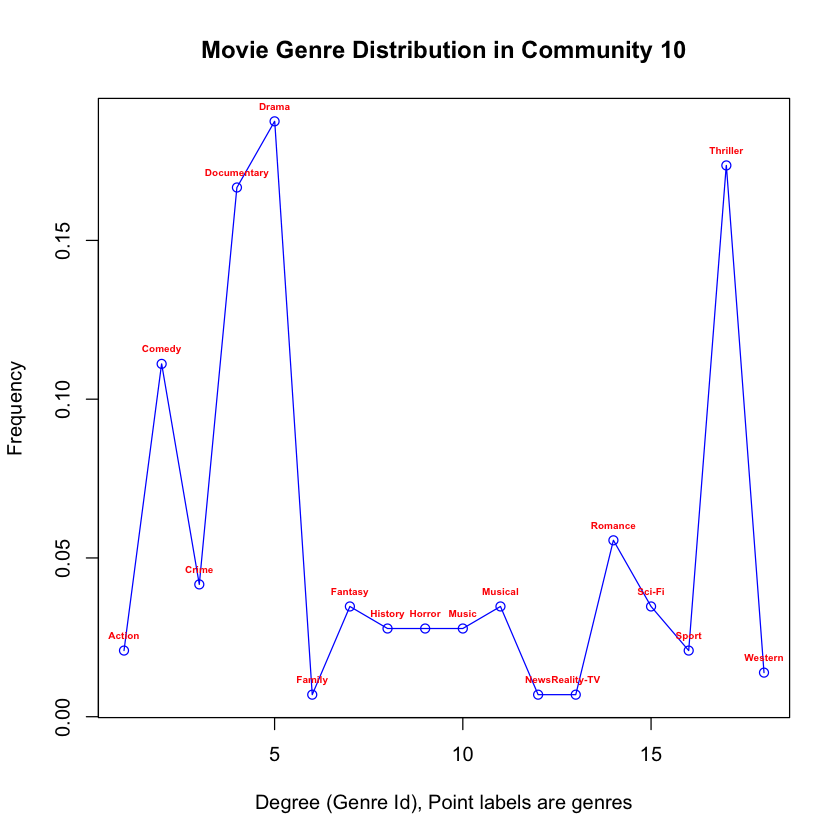

In [190]:
genre_distribution(g, communities, 10)

In [191]:
# Q8 (a)
genres = list()
occur = list()
for(i in 1:length(sizes(communities))) { 
    movies = (1:vcount(g))[communities$membership == i]
    movies_genre = V(g)[movies]$genre
    movies_genre = table(movies_genre)
    genres[[i]] = names(movies_genre[which.max(movies_genre)])
    occur[[i]] = movies_genre[which.max(movies_genre)]
}
for (i in 1:length(sizes(communities))) {
    print(sprintf("The most frequent dominant genre across community %s is %s (%s)", i, genres[[i]], occur[[i]] ))
}

[1] "The most frequent dominant genre across community 1 is Drama (238)"
[1] "The most frequent dominant genre across community 2 is Thriller (211)"
[1] "The most frequent dominant genre across community 3 is Thriller (319)"
[1] "The most frequent dominant genre across community 4 is Thriller (413)"
[1] "The most frequent dominant genre across community 5 is Thriller (148)"
[1] "The most frequent dominant genre across community 6 is Thriller (459)"
[1] "The most frequent dominant genre across community 7 is Thriller (92)"
[1] "The most frequent dominant genre across community 8 is Romance (21)"
[1] "The most frequent dominant genre across community 9 is Adult (287)"
[1] "The most frequent dominant genre across community 10 is Drama (27)"
[1] "The most frequent dominant genre across community 11 is Comedy (16)"


In [192]:
# Q8 (b)
com_size = 0
total_size = sum(sizes(communities))
all_genre = table(V(g)$genre)
genres = list()
scores = list()
for(i in 1:length(sizes(communities))) { 
    max_score = 0
    com_size = sizes(communities)[i]
    movies = (1:vcount(g))[communities$membership == i]
    movies_genre = V(g)[movies]$genre
    movies_genre = table(movies_genre)
    for (j in 1:length(movies_genre)) {
        genre = names(movies_genre)[j]
        c = movies_genre[[j]]
        p = c / com_size
        q = all_genre[[genre]] / total_size
        score = log(c) * p / q
        if (score > max_score) {
            max_score = score
            scores[[i]] = max_score
            genres[[i]] = genre
        }
    }
}
for (i in 1:length(sizes(communities))) {
    print(sprintf("The the most frequent dominant genre across community %s is %s with score %s", i, genres[[i]], scores[[i]]))
}

[1] "The the most frequent dominant genre across community 1 is Drama with score 9.55815636467051"
[1] "The the most frequent dominant genre across community 2 is Sport with score 6.57209394958956"
[1] "The the most frequent dominant genre across community 3 is Romance with score 7.20697887071194"
[1] "The the most frequent dominant genre across community 4 is Adventure with score 15.4946349877886"
[1] "The the most frequent dominant genre across community 5 is Music with score 20.1771154692297"
[1] "The the most frequent dominant genre across community 6 is Western with score 7.86073280031409"
[1] "The the most frequent dominant genre across community 7 is Crime with score 5.85170756793685"
[1] "The the most frequent dominant genre across community 8 is Short with score 7.28513092194143"
[1] "The the most frequent dominant genre across community 9 is Adult with score 74.5596670258927"
[1] "The the most frequent dominant genre across community 10 is Documentary with score 14.5577256203

In [202]:
# Q9 plot 3 neighbor distributions
find_neighbors = function(g, netg, movie) {
    id = V(g)[which(V(g)$name == movie)]
    nei_ids = get.edgeIDs(netg,id,neighborhood="combined")
    print(nei_ids)
    rating_list = c()
#     if (is.na(nei_ids)) {
#         return
#     }
    for (nei_id in nei_ids) {
        rate = V(g)[nei_id]$rating
        if (is.na(rate) | rate != "NA") {
            rating_list = rbind(rating_list, rate)
        }
    }
    table = table(rating_list)
    len = length(table)
    occur_num = as.vector(table)
    occur_ratio = occur_num/sum(occur_num)
    p = occur_ratio/sum(occur_ratio)
    x = seq(1, len, by=1)
    x_num = as.numeric(names(table))
    print(sprintf("most frequent rating of neighbors: %s (%s occur, %s freq)", x_num[which.max(p)], occur_num[which.max(p)], occur_ratio[which.max(p)]))
    print(sprintf("average rating of neighbors: %s", mean(x_num)))
    plot(x, p, type = "o", main = sprintf("Neighbor Rating Degree Distribution (Movie Id = %s)", movie), xlab = "Degree (Rating Id), Point labels are ratings", ylab = "Frequency", col = "blue")
    text(p, labels = names(table), pos = 3, cex=0.5, font=2, col="red")
#     occur = as.vector(table(rating_list))
#     occur = occur/sum(occur)
#     p = occur/sum(occur)
#     print(sum(occur))
#     x = as.numeric(names(table(rating_list)))
#     print(sprintf("most frequent rating of neighbors: %s", x[which.max(p)]))
#     print(sprintf("average rating of neighbors: %s", mean(x)))
#     plot(x, p, type = "o", main = sprintf("Neighbor Rating Degree Distribution (Movie Id = %s)", movie), xlab = "Degree", ylab = "Frequency", col = "blue")
}

In [203]:
netg <- asNetwork(g)

In [204]:
find_neighbors(g,netg,100)

ERROR: Error in if ((v < 1) || (v > n)) return(numeric(0)): missing value where TRUE/FALSE needed


In [228]:
movie_actor_frame = fread(input="/Users/duanli/Documents/P4/movie_actor_1tab.txt", sep = "auto", fill = TRUE, quote = "", header = FALSE)

ERROR: Error in fread(input = "/Users/duanli/Documents/P4/movie_actor_1tab.txt", : Expecting 2 cols, but line 37459 contains text after processing all cols. Try again with fill=TRUE. Another reason could be that fread's logic in distinguishing one or more fields having embedded sep=':' and/or (unescaped) '\n' characters within unbalanced unescaped quotes has failed. If quote='' doesn't help, please file an issue to figure out if the logic could be improved.


In [219]:
# genre_list = c()
movie_name = ""
for (i in 1:10){
    movie_id = V(g)$name[i]
    if (movie_id %in% movie_actor_frame$V1) {
        movie_actor = movie_actor_frame$V2[which(movie_actor_frame$V1 == movie_id)]
        print(movie_actor['American Pimp (1999)'])
    }
#     if(movie_name %in% genre_data_frame$V1){
#         genre = genre_data_frame$V2[which(genre_data_frame$V1 == movie_name)]
#     } else {
#         genre = "NA"
#     }
#     output = sprintf("%s, %s", movie_name, genre)
#     print(output)
#     genre_list = rbind(genre_list, genre)
}

[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA
[1] NA


In [241]:
list = c(0,0,0,1,0,1,0,1,0,1)
g <- make_bipartite_graph( list, c(1:10))
print(rep(0:1,length=10))
plot(g)

ERROR: Error in make_bipartite_graph(list, c(1:10)): At bipartite.c:530 : Invalid edges, not a bipartite graph, Invalid value


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, e

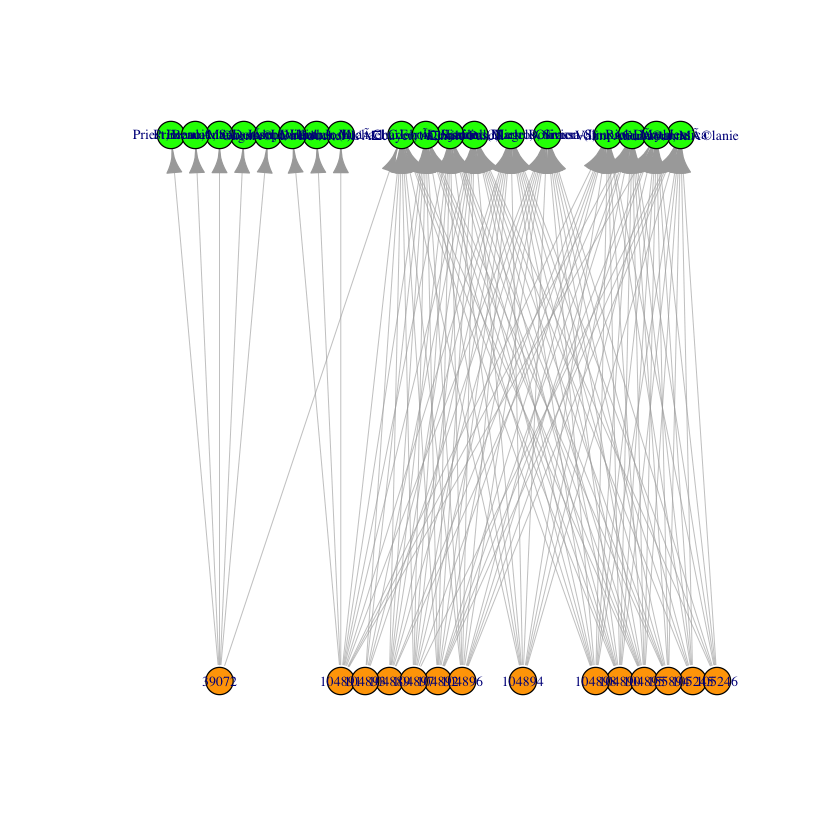

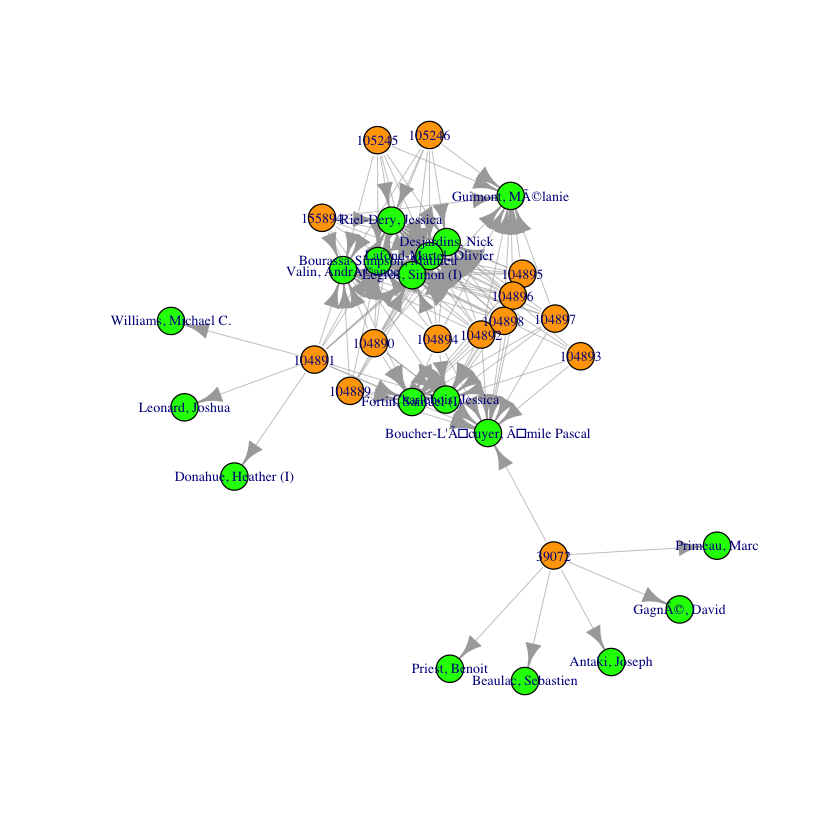

In [359]:
edgelist = fread(input="/Users/duanli/Documents/P4/8c_movie_actor.txt", sep = "\t", header = FALSE)
g1 <- graph.data.frame(edgelist)
col <- c("green","orange")
type_list = list()
for (i in 1:vcount(g1)) {
    if (is.na(as.numeric(V(g1)$name[i]))) {
        type = 0
    } else {
        type = 1
    }
    type_list = cbind(type_list, type)
}
V(g1)$type = type_list
plot(g1, layout = layout_as_bipartite, vertex.color = col[as.numeric(V(g1)$type)+1], vertex.size = 10, vertex.label.cex=0.7, edge.width = 0.5)
plot(g1, layout = layout.kamada.kawai, vertex.color = col[as.numeric(V(g1)$type)+1], vertex.size = 10, vertex.label.cex=0.7, edge.width = 0.5)

In [336]:
deg = degree(g1)

39072 
                                         6 
                                    104889 
                                         8 
                                    104890 
                                        10 
                                    104891 
                                        12 
                                    104892 
                                        10 
                                    104893 
                                         5 
                                    104894 
                                        10 
                                    104895 
                                        10 
                                    104896 
                                        10 
                                    104897 
                                         8 
                                    104898 
                                        10 
                                    105245 
                                         7 
                                    105246 
                                         7 
                                    155894 
                                         8 
                            Antaki, Joseph 
                                         1 
                        Beaulac, Sebastien 
                                         1 
Boucher-L'Ã\u0089cuyer, Ã\u0089mile Pascal 
                                        11 
                             GagnÃ©, David 
                                         1 
                            Priest, Benoit 
                                         1 
                             Primeau, Marc 
                                         1 
                 Bourassa-Simpson, Mathieu 
                                        11 
                          Desjardins, Nick 
                                        13 
                        Fortin, Samuel (I) 
                                        10 
                    Lafond-Martel, Olivier 
                                        13 
                         Legros, Simon (I) 
                                        13 
                       Charlebois, Jessica 
                                        11 
                         Valin, AndrÃ©anne 
                                        11 
                         Guimont, MÃ©lanie 
                                        10 
                        Riel-Dery, Jessica 
                                        10 
                           Leonard, Joshua 
                                         1 
                      Williams, Michael C. 
                                         1 
                      Donahue, Heather (I) 
                                         1

In [375]:
deg = degree(g1)
sort = order(deg, decreasing=TRUE)
for (i in 1:3) {
    index = sort[i]
    print(index)
    print(V(g1)$name[index])
}

[1] 22
[1] "Desjardins, Nick"
[1] 24
[1] "Lafond-Martel, Olivier"
[1] 25
[1] "Legros, Simon (I)"


In [376]:
movie_ids = V(g1)get.edgeIDs(asNetwork(g1),22,neighborhood="combined")
print(movie_ids)

 [1]   9  17  27  39  48  54  64  74  84  92 101 108 114


In [378]:
save(g1, file = "g1.RData")

In [394]:
# Q11
e_edges <- E(g)[from(1)]
e_top_weights <- order(e_edges$weight, decreasing=TRUE)[1:5]
E(g)[ as.vector(e_edges)[e_top_weights] ]
V(g)[5][communities$membership]

+ 5/907 edges from 22f2f81 (vertex names):
[1] 0--126592 0--113176 0--169778 0--4      0--110167

ERROR: Error in simple_vs_index(x, ii, na_ok): Unknown vertex selected


In [411]:
find_ids = function(g, movies) {
    ids = list()
    for (i in movies) {
        id = which(V(g)$name == i)
        ids = rbind(ids, id)
    } 
    return (ids)
}

In [412]:
find_membership = function(g, communities, movies) {
    ids = find_ids(g, movies)
    membership = list()
    for(i in 1:length(sizes(communities))) { 
        movies_same_com = (1:vcount(g))[communities$membership == i]
        for (j in 1:length(movies)) {
            vids = V(g)[movies_same_com]
            id = ids[j]
            if ( id %in% vids) {
                membership[[j]] = i
            }
        }
    }
    return (membership)
}

In [415]:
movies = c(4,5,6)
find_membership(g, communities, movies)

[[1]]
[1] 2

[[2]]
[1] 1

[[3]]
[1] 2

In [425]:
g1

IGRAPH a004fca DN-B 32 121 -- 
+ attr: name (v/c), type (v/x)
+ edges from a004fca (vertex names):
 [1] 39072 ->Antaki, Joseph                            
 [2] 39072 ->Beaulac, Sebastien                        
 [3] 39072 ->Boucher-L'Ã\u0089cuyer, Ã\u0089mile Pascal
 [4] 39072 ->GagnÃ©, David                             
 [5] 39072 ->Priest, Benoit                            
 [6] 39072 ->Primeau, Marc                             
 [7] 104889->Boucher-L'Ã\u0089cuyer, Ã\u0089mile Pascal
 [8] 104889->Bourassa-Simpson, Mathieu                 
+ ... omitted several edges

In [426]:
save(g1, file = "g1.rda")

remove(g1)

In [431]:
load("communities.rda")

In [432]:
communities

IGRAPH clustering fast greedy, groups: 28, mod: 0.8
+ groups:
  $`1`
      [1] "0"      "1"      "2"      "3"      "4"      "5"      "7"     
      [8] "8"      "9"      "25"     "2339"   "2660"   "3586"   "3702"  
     [15] "4734"   "5406"   "5587"   "6834"   "7655"   "7764"   "7827"  
     [22] "9377"   "9444"   "10379"  "11372"  "11375"  "12947"  "14546" 
     [29] "16670"  "17598"  "18306"  "19936"  "20991"  "21955"  "22021" 
     [36] "22048"  "23167"  "27237"  "28092"  "31104"  "31114"  "31213" 
     [43] "32001"  "33764"  "34698"  "35619"  "39259"  "40206"  "40486" 
     [50] "41280"  "43387"  "43397"  "44876"  "45662"  "46979"  "48191" 
     [57] "48798"  "48807"  "51560"  "51864"  "53421"  "53869"  "54485" 
  + ... omitted several groups/vertices